In [4]:
import matplotlib.pyplot as plt
from cycler import cycler


cycler_colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#CF4457', '#188487', '#E24A33']
def set_matplot_params(font_size = 8, xtick_major = 0.25, xtick_minor = 0.25, ytick_major = 0.25, ytick_minor = 0.25):
    params_dict = {
        'text.usetex': False,
        # 'font.family': 'Times New Roman',
        # 'font.serif': 'Times New Roman',
        # 'font.sans-serif': 'Times New Roman',
        'font.size': font_size,
        'figure.figsize': [3.125, 1.93],  # Golden ratio
        #figure.figsize: 3.125, 1.56  # Squash for more space
        'legend.fontsize': 6,
        'legend.fancybox': False,
        'axes.linewidth': 0.5,
        'pdf.fonttype' : 42,
        'ps.fonttype' : 42,
        'axes.prop_cycle': cycler("color", cycler_colors),
                          # 348ABD : blue
                          # A60628 : red
                          # 7A68A6 : purple
                          # 467821 : green
                          # CF4457 : pink
                          # 188487 : turquoise
                          # E24A33 : orange
        'patch.linewidth': 0.5,
        'lines.linewidth': 2,
        'grid.linewidth': 0.1,
        'xtick.major.width': xtick_major,
        'xtick.minor.width': xtick_minor,
        'ytick.major.width': ytick_major,
        'ytick.minor.width': ytick_minor,
        'legend.numpoints': 1}
    plt.rcParams.update(params_dict)
set_matplot_params()

#link retrival for database links
import os

def grab_directory_paths():
    base_path = 'database'
    campus_path = os.path.join(base_path, 'campus')
    satellite_path = os.path.join(base_path, 'satellite')
    paths = {}
    paths["campus"] = {}
    paths["satellite"] = {}
    for speed in ['3Mbps', '5Mbps']:
        paths["campus"][speed] = []
        if speed == '5Mbps':
            paths["satellite"][speed] = []
        campus_speed_path = os.path.join(campus_path, speed)
        satellite_speed_path = os.path.join(satellite_path, speed)
        for folder in range(1, 101):
            campus_folder_path = os.path.join(campus_speed_path, str(folder))
            satellite_folder_path = os.path.join(satellite_speed_path, str(folder))
            if speed == '5Mbps':
                paths["satellite"][speed].append(satellite_folder_path)
            paths["campus"][speed].append(campus_folder_path)
    
    return paths

datapaths = grab_directory_paths()
c5 = datapaths["campus"]["5Mbps"]
c3 = datapaths["campus"]["3Mbps"] 
s5 = datapaths["satellite"]["5Mbps"]
campus = datapaths["campus"]
satellite = datapaths["satellite"]
print(s5)

import os
import pandas as pd
import json

def get_first_positive_row(directory):
    # Get the path of the .csv file in the directory
    csv_file = [file for file in os.listdir(directory) if file.endswith('.csv')]
    if not csv_file:
        return None
    csv_path = os.path.join(directory, csv_file[0])
    
    # Read the .csv file into a pandas DataFrame
    df = pd.read_csv(csv_path)
    
    # Find the first row where currentTime > 0
    first_positive_row = df[df['currentTime'] > 0].iloc[0]
    
    # Convert the first_positive_row to JSON format
    # ...

    first_positive_row_json = first_positive_row.to_json()
    first_positive_row_dict = json.loads(first_positive_row_json)
    
    return first_positive_row_dict


import json
from datetime import datetime
import pytz

def iso_to_epoch_milliseconds(date_string):
    # Parse the date string to a datetime object
    dt = datetime.fromisoformat(date_string)
    
    # Convert the datetime object to UTC
    dt_utc = dt.astimezone(pytz.UTC)
    
    # Calculate the number of milliseconds since Unix epoch
    epoch = datetime(1970, 1, 1, tzinfo=pytz.UTC)
    milliseconds_since_epoch = int((dt_utc - epoch).total_seconds() * 1000)
    
    return milliseconds_since_epoch



def analyze_video_response(folder_path):
    video_responses = []
    qoe_data = get_first_positive_row(folder_path)
    filler_path = os.path.join(folder_path)
    for file_name in os.listdir(filler_path):
        if file_name.endswith(".har"):
            file_path = os.path.join(filler_path, file_name)
            with open(file_path, "r") as file:
                har_data = json.load(file)
                for entry in har_data["log"]["entries"]:
                    try:
                        if entry["response"]["content"]["mimeType"] == "video/mp4":
                            start_time = iso_to_epoch_milliseconds(entry["startedDateTime"])
                            for content in entry["response"]["headers"]:
                                if content['name'] == "Content-Range":
                                    content_range = content
                                if content['name'] == "Content-Length":
                                    content_length = content                            
                            video_response = {
                                "url": entry["request"]["url"],
                                "start_time": start_time,
                                "duration": entry["time"],
                                "response_size": entry["response"]["bodySize"],
                                "status": entry["response"]["status"],
                                "content_range": content_range,
                                "content_length": content_length,
                                "qoe_data": qoe_data
                            }
                            video_responses.append(video_response)
                    except Exception as e:
                        print("Error: " + file_path)
                        print(e)
    return video_responses

def get_first_positive_row(directory):
    # Get the path of the .csv file in the directory
    csv_file = [file for file in os.listdir(directory) if file.endswith('.csv')]
    if not csv_file:
        return None
    csv_path = os.path.join(directory, csv_file[0])
    
    # Read the .csv file into a pandas DataFrame
    df = pd.read_csv(csv_path)
    
    # Find the first row where currentTime > 0
    first_positive_row = df[df['currentTime'] > 0].iloc[0]
    
    # Convert the first_positive_row to JSON format
    # ...

    first_positive_row_json = first_positive_row.to_json()
    first_positive_row_dict = json.loads(first_positive_row_json)
    first_positive_row_dict.pop('attributes')
    
    return first_positive_row_dict

#for dataset with 15 and 60 second videos for link retrieval
import os

def grab_dataset_paths():
    base_path = 'dataset'
    campus_path_15 = os.path.join(base_path, '15/campus')
    campus_path_60 = os.path.join(base_path, '60/campus')
    satellite_path_15 = os.path.join(base_path, '15/satellite')
    satellite_path_60 = os.path.join(base_path, '60/satellite')
    paths = {}
    paths["campus15"] = {}
    paths["campus60"] = {}
    paths["satellite15"] = {}
    paths["satellite60"] = {}
    for speed in ['3Mbps', '5Mbps']:
        paths["campus15"][speed] = []
        paths["campus60"][speed] = []
        paths["satellite15"][speed] = []
        paths["satellite60"][speed] = []
        campus_speed_path_15 = os.path.join(campus_path_15, speed)
        campus_speed_path_60 = os.path.join(campus_path_60, speed)
        satellite_speed_path_15 = os.path.join(satellite_path_15, speed)
        satellite_speed_path_60 = os.path.join(satellite_path_60, speed)
        for folder in range(1, 6):
            campus_folder_path_15 = os.path.join(campus_speed_path_15, str(folder))
            campus_folder_path_60 = os.path.join(campus_speed_path_60, str(folder))
            satellite_folder_path_15 = os.path.join(satellite_speed_path_15, str(folder))
            satellite_folder_path_60 = os.path.join(satellite_speed_path_60, str(folder))
            paths["campus15"][speed].append(campus_folder_path_15)
            paths["campus60"][speed].append(campus_folder_path_60)
            paths["satellite15"][speed].append(satellite_folder_path_15)
            paths["satellite60"][speed].append(satellite_folder_path_60)
    
    return paths


['database/satellite/5Mbps/1', 'database/satellite/5Mbps/2', 'database/satellite/5Mbps/3', 'database/satellite/5Mbps/4', 'database/satellite/5Mbps/5', 'database/satellite/5Mbps/6', 'database/satellite/5Mbps/7', 'database/satellite/5Mbps/8', 'database/satellite/5Mbps/9', 'database/satellite/5Mbps/10', 'database/satellite/5Mbps/11', 'database/satellite/5Mbps/12', 'database/satellite/5Mbps/13', 'database/satellite/5Mbps/14', 'database/satellite/5Mbps/15', 'database/satellite/5Mbps/16', 'database/satellite/5Mbps/17', 'database/satellite/5Mbps/18', 'database/satellite/5Mbps/19', 'database/satellite/5Mbps/20', 'database/satellite/5Mbps/21', 'database/satellite/5Mbps/22', 'database/satellite/5Mbps/23', 'database/satellite/5Mbps/24', 'database/satellite/5Mbps/25', 'database/satellite/5Mbps/26', 'database/satellite/5Mbps/27', 'database/satellite/5Mbps/28', 'database/satellite/5Mbps/29', 'database/satellite/5Mbps/30', 'database/satellite/5Mbps/31', 'database/satellite/5Mbps/32', 'database/satell

In [5]:
data = grab_directory_paths()
c3_har = {}
c5_har = {}
s5_har = {}
# s3_har = {}
for file in c3:
    c3_har[file] = analyze_video_response(file)
for file in c5:
    c5_har[file] = analyze_video_response(file)
# for file in s3:
#     s3_har[file] = analyze_video_response(file)
for file in s5:
    s5_har[file] = analyze_video_response(file)

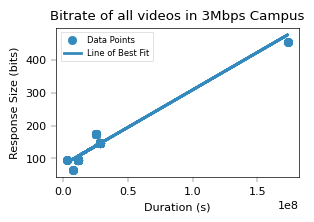

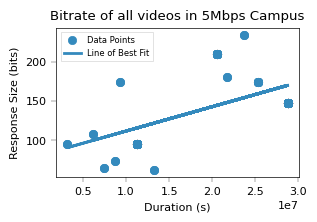

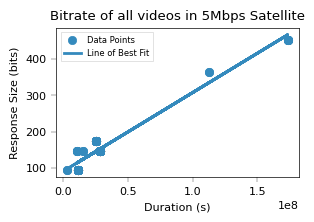

In [64]:
#Bitrate Calculation & Plot -- Question 1

import numpy as np
def plot_bitrate(coordinates, title = 'Bitrate'):
    x = [coord[0] for coord in coordinates]
    y = [coord[1] for coord in coordinates]
    plt.scatter(x, y, color='#348ABD', label='Data Points')
    
    # Calculate line of best fit
    slope, intercept = np.polyfit(x, y, 1)
    line_of_best_fit = [slope * xi + intercept for xi in x]
    plt.plot(x, line_of_best_fit, color='#348ABD', label='Line of Best Fit')
    plt.legend()
    plt.xlabel('Duration (s)')
    plt.ylabel('Response Size (bits)')
    plt.title(title)
    plt.scatter(x, y)
    plt.show()

c5_bitrate = []
c3_bitrate = []
s5_bitrate = []
s3_bitrate = []

def get_bitrate(folder, data):
    for file in folder:
        for key in folder[file]:
            vidbytes = key['content_length']['value']
            vidtime = key['qoe_data']['duration']
            data.append([int(vidbytes),int(vidtime)])
            break


get_bitrate(c3_har, c3_bitrate)
plot_bitrate(c3_bitrate, "Bitrate of all videos in 3Mbps Campus")
get_bitrate(c5_har, c5_bitrate)
plot_bitrate(c5_bitrate, "Bitrate of all videos in 5Mbps Campus")
get_bitrate(s5_har, s5_bitrate)
plot_bitrate(s5_bitrate, "Bitrate of all videos in 5Mbps Satellite")
# get_bitrate(s3_har, s3_bitrate)
# plot_bitrate(s3_bitrate, "Bitrate of all videos in 3Mbps Satellite")



In [61]:
# What is the average prefetch requests? -- Question 2
import statistics
def get_total_requests(folder):
    total_requests = []
    for file in folder:
        total = 0
        for key in folder[file]:
            total+=1
        total_requests.append(total)
    return total_requests

def get_unique_requests(folder):
    total_requests = []
    for file in folder:
        total = 0
        datasizes = []
        for key in folder[file]:
            if key['url'].split('/')[7] not in datasizes:
                datasizes.append(key['url'].split('/')[7])
        total_requests.append(len(datasizes))
    return total_requests

def calculate_stats(numbers, title = 'Statistics'):
    mean = statistics.mean(numbers)
    median = statistics.median(numbers)
    mode = statistics.mode(numbers)
    data_range = max(numbers) - min(numbers)
    stdev = statistics.stdev(numbers)
    
    print(f"{title} - Mean: {mean}, Median: {median}, Mode: {mode}, Range: {data_range}, Standard Deviation: {stdev}")

calculate_stats(get_total_requests(c3_har), "Total Requests for Campus 3Mbps Statistics")
calculate_stats(get_total_requests(c5_har), "Total Requests for Campus 5Mbps Statistics")
calculate_stats(get_total_requests(s5_har), "Total Requests for Satellite 5Mbps Statistics")
# calculate_stats(get_total_requests(s3_har), "Total Requests for Satellite 5Mbps Statistics")

calculate_stats(get_unique_requests(c3_har), "Unique Requests for Campus 3Mbps Statistics")
calculate_stats(get_unique_requests(c5_har), "Unique Requests for Campus 5Mbps Statistics")
calculate_stats(get_unique_requests(s5_har), "Unique Requests for Satellite 5Mbps Statistics")
# calculate_stats(get_unique_requests(s3_har), "Unique Requests for Satellite 5Mbps Statistics")





Total Requests for Campus 3Mbps Statistics - Mean: 4.48, Median: 5.0, Mode: 7, Range: 7, Standard Deviation: 2.253975164105417
Total Requests for Campus 5Mbps Statistics - Mean: 7, Median: 7.0, Mode: 7, Range: 0, Standard Deviation: 0.0
Total Requests for Satellite 5Mbps Statistics - Mean: 6.72, Median: 7.0, Mode: 7, Range: 7, Standard Deviation: 1.3786246989685267
Unique Requests for Campus 3Mbps Statistics - Mean: 2.75, Median: 3.0, Mode: 4, Range: 4, Standard Deviation: 1.1492202011394816
Unique Requests for Campus 5Mbps Statistics - Mean: 4, Median: 4.0, Mode: 4, Range: 0, Standard Deviation: 0.0
Unique Requests for Satellite 5Mbps Statistics - Mean: 3.84, Median: 4.0, Mode: 4, Range: 4, Standard Deviation: 0.7877855422677295


In [74]:
# Duration From First Request to Last Request
def get_duration(folder):
    durations = []
    for file in folder:
        print(file[0])

get_duration(c3_har)

d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d


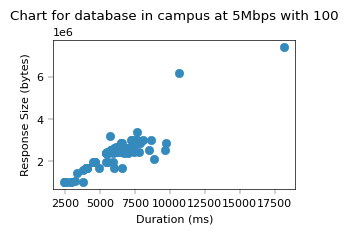

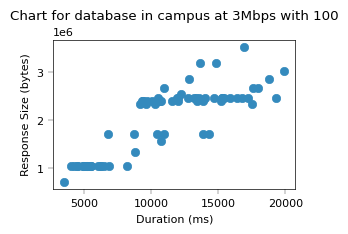

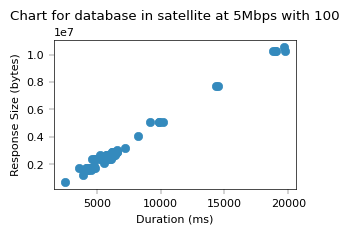

In [63]:
import matplotlib.pyplot as plt
import numpy as np

def chart_data(data, keys):
    filtered_durations = []
    filtered_response_sizes = []
    for key in keys:
        random = key
        if key in data:
            durations = [response['duration'] for response in data[key] if response['duration'] and response['duration'] < 20000]
            response_sizes = [response['response_size'] for response in data[key] if response['duration'] and response['duration'] < 20000]
            
            # Filter out response_sizes that are -1
            for i in range(len(response_sizes)):
                if response_sizes[i] != -1:
                    filtered_durations.append(durations[i])
                    filtered_response_sizes.append(response_sizes[i])
                    break

            

    # filtered_durations = remove_outliers(filtered_durations)
    # filtered_response_sizes = remove_outliers(filtered_response_sizes)
    random = random.split('/')
    if len(random) == 5:
        base, time, location, rate, run_label = random
        text = f"Chart for {base} at {time} in {location} at {rate} with {run_label}"
    if len(random) == 4:
        base, location, rate, run_label = random
        text = f"Chart for {base} in {location} at {rate} with {run_label}"
    
    plt.scatter(filtered_durations, filtered_response_sizes)
    plt.xlabel('Duration (ms)')
    plt.ylabel('Response Size (bytes)')
    plt.title(text)
    plt.show()

# # Example usage
chart_data(data, c5)
chart_data(data, c3)
chart_data(data, s5)



In [49]:
import os
import pandas as pd
import json

def get_first_positive_row(directory):
    # Get the path of the .csv file in the directory
    csv_file = [file for file in os.listdir(directory) if file.endswith('.csv')]
    if not csv_file:
        return None
    csv_path = os.path.join(directory, csv_file[0])
    
    # Read the .csv file into a pandas DataFrame
    df = pd.read_csv(csv_path)
    
    # Find the first row where currentTime > 0
    first_positive_row = df[df['currentTime'] > 0].iloc[0]
    
    # Convert the first_positive_row to JSON format
    # ...

    first_positive_row_json = first_positive_row.to_json()
    first_positive_row_dict = json.loads(first_positive_row_json)
    
    return first_positive_row_dict

QoE = {}
for folder in data:
    adj_folder = os.path.join(folder)
    first_positive_row = get_first_positive_row(adj_folder)
    if first_positive_row is not None:
        QoE[folder] = first_positive_row
    else:
        print(f"Could not find a positive currentTime in {folder}")  
    QoE[folder]['player_load_time'] = QoE[folder]['extension_loaded_time'] - data[folder][0]['start_time']
    print(folder, QoE[folder]['player_load_time'])


database/campus/5Mbps/1 -11120
database/campus/5Mbps/2 312
database/campus/5Mbps/3 -13787
database/campus/5Mbps/4 -12140
database/campus/5Mbps/5 -10594
database/campus/5Mbps/6 737
database/campus/5Mbps/7 -11204
database/campus/5Mbps/8 487
database/campus/5Mbps/9 -17659
database/campus/5Mbps/10 304
database/campus/5Mbps/11 944
database/campus/5Mbps/12 308
database/campus/5Mbps/13 -11992
database/campus/5Mbps/14 -10828
database/campus/5Mbps/15 866
database/campus/5Mbps/16 -12124
database/campus/5Mbps/17 -11966
database/campus/5Mbps/18 777
database/campus/5Mbps/19 -11132
database/campus/5Mbps/20 378
database/campus/5Mbps/21 -10983
database/campus/5Mbps/22 -12099
database/campus/5Mbps/23 -10558
database/campus/5Mbps/24 -11018
database/campus/5Mbps/25 415
database/campus/5Mbps/26 -12250
database/campus/5Mbps/27 -23613
database/campus/5Mbps/28 -11320
database/campus/5Mbps/29 -11515
database/campus/5Mbps/30 535
database/campus/5Mbps/31 372
database/campus/5Mbps/32 -11569
database/campus/5Mbps

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

['database', 'campus', '3Mbps', '1']


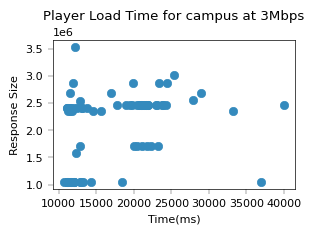

['database', 'campus', '5Mbps', '1']


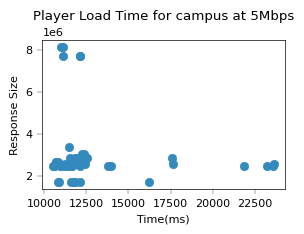

['database', 'satellite', '5Mbps', '1']


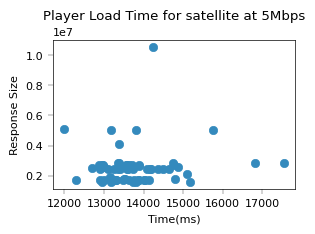

In [72]:
def chart_time(data, keys):
    loadtimes = []
    response_sizes = []
    splitkey = splitkey = keys[0].split('/')
    print(splitkey)
    for key in keys:
        first_row = get_first_positive_row(key)
        if first_row == None or data[key] == []:
            continue
        else:
            load_time = first_row['extension_loaded_time']
            if data[key][0]['start_time']-load_time>0:
                loadtimes.append(data[key][0]['start_time']-load_time)
                response_sizes.append(data[key][0]['response_size'])

                
    plt.scatter(loadtimes, response_sizes)
    plt.xlabel('Time(ms)')
    plt.ylabel('Response Size')
    plt.title(f'Player Load Time for {splitkey[1]} at {splitkey[2]}')
    plt.show()

chart_time(data, c3)
chart_time(data, c5)
chart_time(data, s5)

# incomplete, need to figure out if the response_sizes are for a single or multiple request, 
# find the correct single one
# and then compare that to the load time of the player


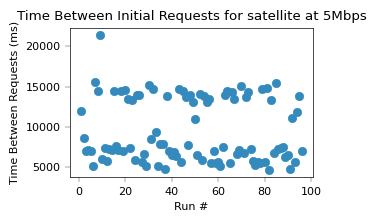

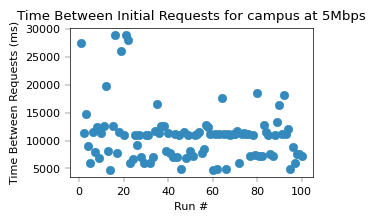

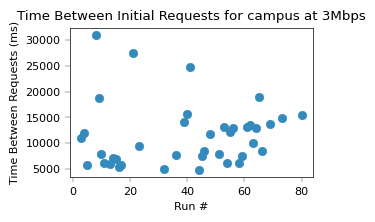

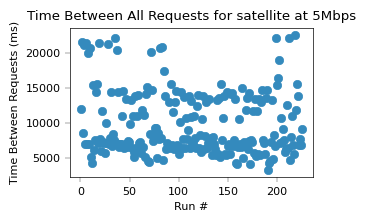

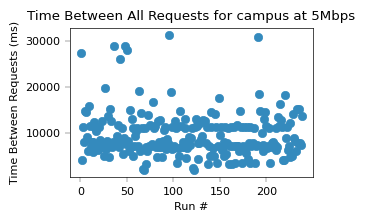

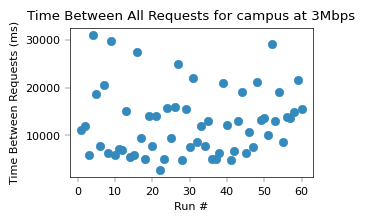

In [27]:
import numpy as np

def prefetching_collect(data, keys):
    prefetching_times = {}
    for key in keys:
        if key in data:
            for i in range(len(data[key])):
                if i == 0:
                    prefetching_times[key] = []
                    continue
                else:
                    prefetching_times[key].append(data[key][i]['start_time'] - data[key][i-1]['start_time'])
    return prefetching_times

c5_pd = prefetching_collect(data, c5)
c3_pd = prefetching_collect(data, c3)
s5_pd = prefetching_collect(data, s5)

import matplotlib.pyplot as plt

def chart_first_prefetch(data):
    count = 1
    title = ""
    for folder in data:
        title = folder.split('/')
        if len(data[folder])>0:
            plt.scatter(count, data[folder][0], color='#348ABD')
        count+=1
    plt.xlabel('Run #')
    plt.ylabel('Time Between Requests (ms)')
    plt.title(f'Time Between Initial Requests for {title[1]} at {title[2]}')
    plt.show()

def chart_all_prefetch(data):
    count = 1
    title = ""
    for folder in data:
        title = folder.split('/')
        for value in data[folder]:
            plt.scatter(count, value, color='#348ABD')
            count+=1
    plt.xlabel('Run #')
    plt.ylabel('Time Between Requests (ms)')
    plt.title(f'Time Between All Requests for {title[1]} at {title[2]}')
    plt.show()


# Example usage
chart_first_prefetch(s5_pd)
chart_first_prefetch(c5_pd)
chart_first_prefetch(c3_pd)
chart_all_prefetch(s5_pd)
chart_all_prefetch(c5_pd)
chart_all_prefetch(c3_pd)



    
   
